# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

###### Introduction

I am very new to using Matplotlib and just didn't have enough time to learn how to harness all of its power to visualize the types of things I wanted to. However, I've done my best with my limited knowledge and plotted images from my various datasets as you'll soon see below. I look forward to learning more of Matplotlib as I see tremendous value in being able to visualize data.

To make things easy when visualizing the traffic signs, let's first print the traffic sign names as well as some additional metrics about the dataset.

In [1]:
import numpy as np

from datasets.german_traffic_signs import GermanTrafficSignDataset

# NOTE I explain these two lines in greater details below
data = GermanTrafficSignDataset(verbose=False)
data.configure(one_hot=True, train_validate_split_percentage=0.2)

print(data)

 
One-Hot Encoded:             True
Train/Validation Split %:    0.2
 
Training size:               31367
Validation size:             7842
Testing size:                12630
Predicting size:             13
Total classes:               43
 
Training orig shape:         (31367, 32, 32, 3)
Training gray shape:         (31367, 32, 32)
Training flat shape:         (31367, 1024)
 
Validation orig shape:       (7842, 32, 32, 3)
Validation gray shape:       (7842, 32, 32)
Validation flat shape:       (7842, 1024)
 
Testing orig shape:          (12630, 32, 32, 3)
Testing gray shape:          (12630, 32, 32)
Testing flat shape:          (12630, 1024)
 
Predicting orig shape:       (13, 32, 32, 3)
Predicting gray shape:       (13, 32, 32)
Predicting flat shape:       (13, 1024)
 
Training label shape:        (31367, 43)
Validation flat label shape: (7842, 43)
Testing gray label shape:    (12630, 43)
 
Class counts:
 
Sign names:
 
  class - no. train - sign name
 
  0 -  174 - Speed limit (20km/

### Sign Class Sample Distribution Visualizations

In [27]:
def plot_sample_class_distributions(samples, title):
    label_count = collections.Counter(np.argmax(samples, axis=1))

    labels, values = zip(*label_count.items())
    indexes = np.arange(len(labels))

    plt.bar(indexes, values, alpha=0.75)
    plt.axis([0, 43, 0, np.max(values)+10])

    plt.xlabel('Sign Class')
    plt.ylabel('No. Traffic Signs')
    plt.title(title)

    plt.show()

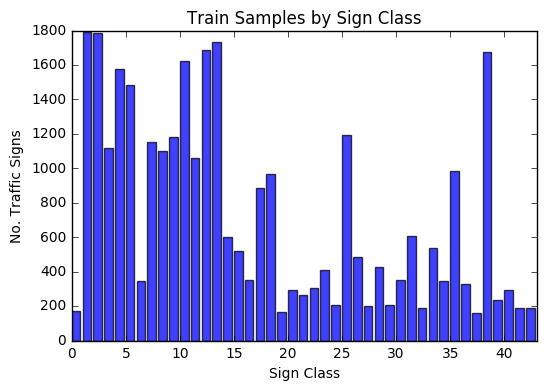

In [29]:
plot_sample_class_distributions(samples=data.train_labels, title='Train Samples by Sign Class')

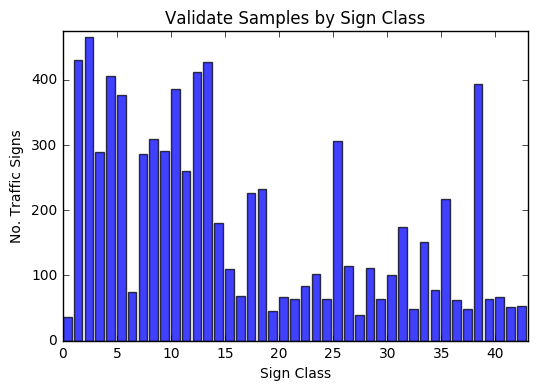

In [26]:
plot_sample_class_distributions(samples=data.validate_labels, title='Validate Samples by Sign Class')

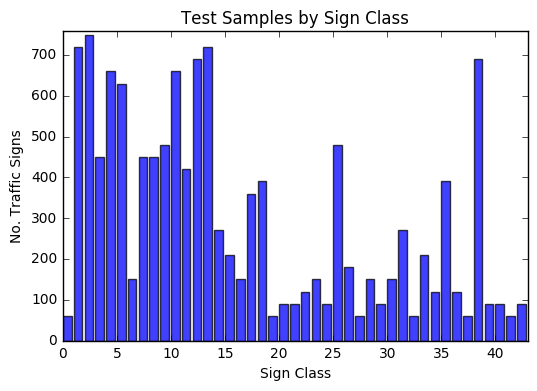

In [28]:
plot_sample_class_distributions(samples=data.test_labels, title='Test Samples by Sign Class')

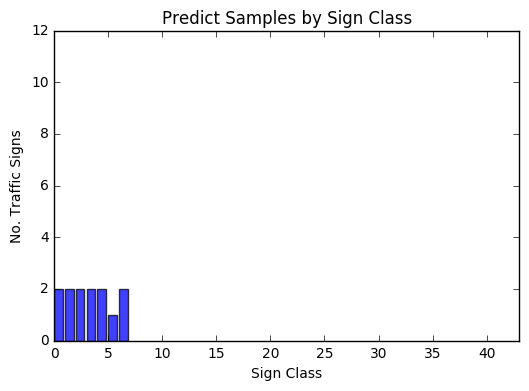

In [30]:
plot_sample_class_distributions(samples=data.predict_labels, title='Predict Samples by Sign Class')

### Traffic Sign Visualizations

##### Training Set

In [ ]:
from plot.image_plotter import ImagePlotter

rows = 4
cols = 6
sample_size = rows*cols

perm = np.arange(data.num_training)
np.random.shuffle(perm)

sample_set = perm[:sample_size]
print('Plotting training images {}'.format(','.join(map(str, sample_set))))

ImagePlotter.plot_images(
    images=data.train_orig[perm[:sample_size]], 
    labels=[np.argmax(label) for label in data.train_labels[perm[:sample_size]]], 
    rows=rows, columns=cols)

##### Validation Set

In [ ]:
from plot.image_plotter import ImagePlotter

rows = 4
cols = 6
sample_size = rows*cols

perm = np.arange(data.num_validation)
np.random.shuffle(perm)

sample_set = perm[:sample_size]
print('Plotting validation images {}'.format(','.join(map(str, sample_set))))

ImagePlotter.plot_images(
    images=data.validate_orig[perm[:sample_size]], 
    labels=[np.argmax(label) for label in data.validate_labels[perm[:sample_size]]], 
    rows=rows, columns=cols)

##### Testing Set

In [ ]:
from plot.image_plotter import ImagePlotter

rows = 4
cols = 6
sample_size = rows*cols

perm = np.arange(data.num_testing)
np.random.shuffle(perm)

sample_set = perm[:sample_size]
print('Plotting testing images {}'.format(','.join(map(str, sample_set))))

ImagePlotter.plot_images(
    images=data.test_orig[perm[:sample_size]], 
    labels=[np.argmax(label) for label in data.test_labels[perm[:sample_size]]], 
    rows=rows, columns=cols)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

### Dataset preparation

First, let's construct a fresh German Traffic Sign dataset. Nothing fancy goes on here but things are about to get awesome real quick. Stay tuned!

>**NOTE** If you pass *verbose=True* to the GermanTrafficSignDataset, you'll see some logs printed informing us about what it's doing during the configuration process.

```python
from datasets.german_traffic_signs import GermanTrafficSignDataset

data = GermanTrafficSignDataset(verbose=False)
```

Next, let's configure the dataset. We're going to ask it to set aside 20% of the training dataset for validation purposes when we're training our model. We're also going to ask it to One-Hot Encode the training, validation, test and prediction labels so we don't have to do any work later on.

>In hindsight, I'd rather do this in Tensorflow as I found myself having to call *np.maxarg()* in several places to visualize and perform comparison operations.

```python
# Configure the dataset
data.configure(one_hot=True, train_validate_split_percentage=0.20)
```

That was easy! Almost too easy, really. What's actually going on there?

Let's print the documentation for the GermanTrafficSignDataset#configure method to uncover the magic and reveal the tecniques I used to preprocess the data.

In [ ]:
from IPython.display import Image, display
from IPython.core.display import HTML 
display(Image(url= "doc/GermanTrafficSignDataset_configure_docs.png"))

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

Inside of [data.__split_train_and_validation](https://github.com/matthewzimmer/traffic-sign-classification/blob/426c2467a1405ba6ba12c474ccd459f72d392c20/datasets/german_traffic_signs.py#L254-L267 "data.__split_train_and_validation") I leverage SKLearn's [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) convenience method. It's great because it automatically randomizes the validation set based on a predetermined percentage. I chose the traditional 80/20 split out of habit and felt that if I achieved a high accuracy with 80% of the training data, this should generalize well enough to the other 20% as well as the testing and prediction sets.

>**NOTE:** I'm using a fixed random_state number so my testing is relatively predictable and consistent across runs.

```python
def __split_train_and_validation(self):
    """
    Get randomized datasets for training and validation
    """

    self.train_orig, self.validate_orig, self.train_labels, self.validate_labels = train_test_split(
        self.train_orig,
        self.train_labels,
        test_size=self.split_size,
        random_state=832224)

    print('Training features and labels randomized and split with train_test_split (validation % of training set: {})'.format(self.split_size))
```

You can also see it in github [here](https://github.com/matthewzimmer/traffic-sign-classification/blob/7e241e3289a6792cb6ebf2ff051995cdbbd0bdae/datasets/german_traffic_signs.py#L254-L267 "here").

The second phase of splitting my data may be discovered inside of [data.__prepare_images](https://github.com/matthewzimmer/traffic-sign-classification/blob/7e241e3289a6792cb6ebf2ff051995cdbbd0bdae/datasets/german_traffic_signs.py#L278-L355). 

For convenience, here is the documentation for __prepare_images.

In [ ]:
from IPython.display import Image, display
from IPython.core.display import HTML 
display(Image(url= "doc/GermanTrafficSignDataset___prepare_images_docs.png"))

Finally, let's print our instance of GermanTrafficSignDataset. It reveals a ton of information about the contents of the **data** variable such as the number and shape of items in each bucket and the traffic sign names corresponding to each label.

In [ ]:
print(data)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The very first network I put together was a simple three layer linear neural network with a single hidden layer with 512 neurons inspired by the first TensorFlow lab we did in class. It allowed me to education and familiarize myself with Python, Numpy, Matplotlib and TensorFlow.

> **NOTE** I've never coded in Python, Numpy, Jupyter Notebook, TensorFlow or Matplotlib until now so it took me longer than desired to get this far but I am satisfied with my first attempt and I am more comfortable now than I was when I first started.

My final architecture is a simple three layer linear neural network with a single hidden layer with 256 neurons. After a bit of research, it appears the rule-of-thumb baseline for hidden layer neurons is to calculate the mean of the intput and output nurons but I squeezed about 3.5% better accuracy with 256 neurons plus it trains faster so I stuck with it.

##### Framework

I built a simple framework allowing me to rapidly test various hyper parameters to obtain the most optimal model to yield the highest accuracy against photos I took myself.

Each implementation of BaseNeuralNetwork essentially needs to override two methods: *#fit* and *#predict*. I ultimately plan to implemente a Convolutional Neural Network. However, I am aware that Convnets will yield more accurate prediction the more layers you have but I wanted to truly grasp the fundamentals of Neural Networks, Gradient Descent optimizers, hyperparameter optimization, dataset splitting, trained model persistence and restoration to predict against later on (something we'd do in a production setting), and so much more.

##### Model Training Walkthrough Step-by-Step

I've already described the steps necessary to prepare the dataset we'll be using to train the network above.

Let's now define our hyper parameters. We will be feeding them into the network's configuration context next.

```python
from classifiers.linear.single_layer_linear import SingleLayerHyperParametersContext

hyper_parameters = SingleLayerHyperParametersContext(
    hidden_layer_neuron_count=256,
    start_learning_rate=0.2, 
    epochs=300, 
    batch_size=20, 
    required_accuracy_improvement=25
)
```

An instance of [ConfigurationContext](https://github.com/matthewzimmer/traffic-sign-classification/blob/be3f9451be99d17e5366f1117ae7e24fad7123d9/classifiers/base_neural_network.py#L40-L54) holds a reference to our GermanTrafficSignDataset instance variable and our SingleLayerHyperParametersContext instance variable.

>**NOTE** This object is required by all _BaseNeuralNetwork_ implementations. Otherwise training will not occur.

```python
from classifiers.base_neural_network import ConfigurationContext

config_context = ConfigurationContext(dataset=data, optimizer=ConfigurationContext.OPTIMIZER_TYPE_GRADIENT_DESCENT, hyper_parameters=hyper_parameters)
```

First thing's first, let's instantiate the SingleLayerLinear class.

```python
from classifiers.linear.single_layer_linear import SingleLayerLinear

simple_nn = SingleLayerLinear()```

Next, let's configure our network by passing in our ConfigurationContext instance variable we instantiated above.

This is the principle entry point into all _BaseNeuralNetwork_ implementations. 

>**NOTE** The network will not function without a proper configuration context.

```python
simple_nn.configure(config_context)
```

To train the network, we call the *#generate* method. This could take anywhere from 10 minutes to several hours depending on hardware and hyperparameter settings.

>**NOTE** *#configure* must be called first.

```python
simple_nn.generate()
```

##### Prediction Code Example

To predict against a previously trained network, we call the *BaseNueralNetwork#predict* method passing it the name of a previously trained model.

```python
from classifiers.linear.single_layer_linear import SingleLayerLinear
from datasets.german_traffic_signs import GermanTrafficSignDataset

# I put my captured photos inside of GermanTrafficSignDataset so we need 
# inject the predict_flat images into #predict.
data = GermanTrafficSignDataset()
data.configure(one_hot=True)

simple_nn = SingleLayerLinear()
simple_nn.configure(ConfigurationContext(dataset=data, hyper_parameters=SingleLayerHyperParametersContext()))
simple_nn.predict(images=data.predict_flat, labels=data.predict_labels, model_name='SingleLayerLinear_e536a998-bc7c-461c-8b2a-fc278de569d8_best_validation_0.20S_0.2000LR_300E_20B_256HN')
```

##### SingleLayerLinear Class Definition

Because a lot of my code is hidden inside my framework, here's a print out of the class the does the modeling and predicting.

```python
import tensorflow as tf
import numpy as np
import math
import os

from classifiers.base_neural_network import BaseNeuralNetwork, HyperParametersContext, ConfigurationContext


class SingleLayerHyperParametersContext(HyperParametersContext):
    def __init__(
            self,
            hidden_layer_neuron_count=256,
            **kwargs
    ):
        """

        :param hidden_layer_neuron_count: number of neurons for the hidden layer
        :param kwargs: Arguments to pass into to super constructor
        """
        super(SingleLayerHyperParametersContext, self).__init__(**kwargs)
        self.hidden_layer_neuron_count = hidden_layer_neuron_count


class SingleLayerLinear(BaseNeuralNetwork):
    def fit(self):
        data = self.config.data
        hyper_parameters = self.config.hyper_parameters

        self.__build_graph()

        features = self.features
        labels = self.labels
        logits = self.logits

        # Passing global_step to minimize() will increment it at each step.
        global_step = tf.Variable(0, trainable=False)

        # Define loss
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, labels))

        # Configure optimizer
        if self.config.optimizer_type == ConfigurationContext.OPTIMIZER_TYPE_GRADIENT_DESCENT:
            # decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)
            learning_rate = tf.train.exponential_decay(learning_rate=hyper_parameters.start_learning_rate,
                                                       global_step=global_step,
                                                       decay_steps=75000, decay_rate=0.96, staircase=True)
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss,               global_step=global_step)
        elif self.config.optimizer_type == ConfigurationContext.OPTIMIZER_TYPE_ADAGRAD:
            learning_rate = tf.constant(hyper_parameters.start_learning_rate)
            optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate).minimize(loss)

        batch_size = hyper_parameters.batch_size
        training_epochs = hyper_parameters.epochs
        batch_count = int(math.ceil(data.num_training / batch_size))
        display_step = 1

        with tf.Session() as sess:
            sess.run(tf.initialize_all_variables())
            
            valid_feed_dict = {features: data.validate_flat, labels: data.validate_labels}
            
            for epoch in range(training_epochs):
                # Loop over all batches
                for i in range(batch_count):
                    x_batch, y_batch, batch_start, batch_end = data.next_batch(batch_size)
                    # Run optimization op (backprop) and loss op (to get loss value)
                    sess.run(optimizer, feed_dict={features: x_batch, labels: y_batch})

                # Display logs per epoch step and very last batch iteration
                if epoch % display_step == 0 or (epoch == (training_epochs - 1) and i == (batch_count - 1)):
                    total_iterations = (epoch + 1)

                    # Calculate accuracy
                    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
                    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

                    saved = self.evaluate_accuracy(sess, accuracy.eval(valid_feed_dict), total_iterations)

                if total_iterations - self.last_improvement > hyper_parameters.required_accuracy_improvement:
                    msg = 'No improvement found in a while, stopping optimization after {} iterations. Final accuracy, {}% at iteration {}.'.format(
                        total_iterations, str(int(self.validate_accuracy * 100)), self.last_improvement)

                    print(msg)

                    break

            print("Optimization Finished!")

    def predict(self, images, true_labels, model_name):
        self.__build_graph()

        features = self.features
        labels = self.labels
        logits = self.logits

        with tf.Session() as sess:
            self.saver = tf.train.Saver()
            self.saver.restore(sess, self.save_dir + '/' + model_name)

            # Number of images.
            num_images = len(images)

            # Allocate an array for the predicted classes which
            # will be calculated in batches and filled into this array.
            cls_pred = np.zeros(shape=num_images, dtype=np.int)

            feed_dict = {features: images, labels: true_labels}

            y_pred_cls = tf.argmax(logits, dimension=1)
            cls_pred = sess.run(y_pred_cls, feed_dict=feed_dict)

            # Calculate accuracy
            correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

            predictions = tf.cast(correct_prediction.eval(feed_dict), "bool").eval()
            print(predictions)

            correct = (np.argmax(true_labels, axis=1) == cls_pred)

            print("  predict accuracy: {:004f}%".format(accuracy.eval(feed_dict) * 100))

            return correct, cls_pred

    def __build_graph(self):
        data = self.config.data
        hyper_parameters = self.config.hyper_parameters

        image_size = data.train_flat.shape[1]
        num_classes = data.num_classes

        n_hidden_layer = hyper_parameters.hidden_layer_neuron_count

        # Store layers weight & bias
        self.weight_variables = {
            'hidden_layer': tf.Variable(tf.random_normal([image_size, n_hidden_layer]), name='weights_hidden_layer'),
            'out': tf.Variable(tf.random_normal([n_hidden_layer, num_classes]), name='weights_out')
        }
        self.bias_variables = {
            'hidden_layer': tf.Variable(tf.zeros([n_hidden_layer]), name='biases_hidden_layer'),
            'out': tf.Variable(tf.zeros([num_classes]), name='biases_out')
        }

        self.features = tf.placeholder("float", [None, image_size])
        self.labels = tf.placeholder("float", [None, num_classes])

        # Hidden layer with RELU activation
        layer_1 = tf.add(tf.matmul(self.features, self.weight_variables['hidden_layer']),
                         self.bias_variables['hidden_layer'])
        layer_1 = tf.nn.relu(layer_1)

        # Output layer with linear activation
        self.logits = tf.matmul(layer_1, self.weight_variables['out']) + self.bias_variables['out']


```

#### Train the model

>**NOTE** We've already instantiated our dataset in the beginning of this notebook so I've printed Markdown for demonstration purposes.

```python
from datasets.german_traffic_signs import GermanTrafficSignDataset

data = GermanTrafficSignDataset()

# Configure the dataset
data.configure(one_hot=True, train_validate_split_percentage=0.20)
```

In [ ]:
from classifiers.linear.single_layer_linear import SingleLayerHyperParametersContext

hyper_parameters = SingleLayerHyperParametersContext(
    hidden_layer_neuron_count=256, # mean of input and output neurons
    start_learning_rate=0.2, 
    epochs=300, 
    batch_size=20, 
    required_accuracy_improvement=25
)

In [ ]:
from classifiers.base_neural_network import ConfigurationContext

config = ConfigurationContext(dataset=data, 
                              optimizer_type=ConfigurationContext.OPTIMIZER_TYPE_GRADIENT_DESCENT, 
                              hyper_parameters=hyper_parameters)

In [ ]:
from classifiers.linear.single_layer_linear import SingleLayerLinear

simple_nn = SingleLayerLinear()
simple_nn.configure(config)

Uncomment the next line if you wish to train the network on your machine. 

>**WARNING** You may want to tune the HyperParametersContext's batch_size above depending on your computer hardware.

In [ ]:
# simple_nn.generate()

```python
Model fit started.


===========> [FIT MODEL] Started at 01:26:31.891089


Epoch: 0001 of 0300
  loss:               46.229114532
  batch accuracy:     0.6
  train accuracy:     0.337839
  validate accuracy:  0.320454
  test accuracy:      0.292241
  predict accuracy:   0.307692
  batch size:         20
  learning rate:      0.2

32.05% accuracy

...

Epoch: 0073 of 0300
  loss:               2.696399927
  batch accuracy:     1.0
  train accuracy:     0.880448
  validate accuracy:  0.848891
  test accuracy:      0.712906
  predict accuracy:   0.769231
  batch size:         20
  learning rate:      0.192
  
...


Epoch: 0185 of 0300
  loss:               3.191812277
  batch accuracy:     1.0
  train accuracy:     0.953773
  validate accuracy:  0.911502
  test accuracy:      0.797625
  predict accuracy:   0.769231
  batch size:         20
  learning rate:      0.176947

No improvement found in a while, stopping optimization after 185 iterations. Final accuracy, 91% at iteration 159.
Optimization Finished!


===========> [FIT MODEL] Finished at 01:42:45.742726

===========> [FIT MODEL] Wall time: 0:16:13.851637

Model fit complete!
The best validation accuracy achieved was 92.04% at iteration 159.
Network serialized to the data directory.
The most accurate validation model has been serialized to the trained models directory.

└[∵┌]   └[ ∵ ]┘   [┐∵]┘   └[ ∵ ]┘   └[∵┌]   └[ ∵ ]┘   [┐∵]┘   └[ ∵ ]┘   └[∵┌]
```

### Best Validation Accuracy: 93.71%

Here are the hyperparameters used to achieve this accuracy and the saved model name corresponding to the file generated by tf.train.Saver#save.

##### Hyperparameters

**EPOCHS** 300

**BATCH SIZE** 20

**HIDDEN NEURONS** 256

**START LR** 0.20

**FINAL DECAYED LR** 0.194642

**REQUIRED ACCURACY IMPROVEMENT** 50

**BEST EPOCH** 286


##### Best Validation Accuracy Model

SingleLayerLinear_e536a998-bc7c-461c-8b2a-fc278de569d8_best_validation_0.20S_0.2000LR_300E_20B_256HN

### 2nd Best Validation Accuracy: 92.04%

Here are the hyperparameters used to achieve this accuracy and the saved model name corresponding to the file generated by tf.train.Saver#save.

##### Hyperparameters

**EPOCHS** 300

**BATCH SIZE** 20

**HIDDEN NEURONS** 256

**START LR** 0.20

**FINAL DECAYED LR** 0.176947

**REQUIRED ACCURACY IMPROVEMENT** 25

**BEST EPOCH** 159


##### 2nd Best Validation Accuracy Model

SingleLayerLinear_bc29549c-d187-4b9c-9a65-3de6c5f2310c_best_validation_0.20S_0.2000LR_300E_20B

As you can see, the biggest difference between those two models is the amount of time it took to train. The second model took only 16 minutes to train. The first model took about 30 minutes and only achieved a little over 1.5%. They both have similar accuracies for the test and prediction images.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

##### Optimizer

I used the *GradientDescentOptimizer* coupled with a decayed_learning_rate over time via **tf.train.exponential_decay**. The intial learning rate was *0.2*, decay_steps of *75000*, decay_rate of *0.96*, and staircase was *True*.

I also incorporated the option to use the *Adagrad* optimizer (ConfigurationContext argument) but after running it for the first time with similar hyperparameters, it got to aroudn 84% accuracy at 200 epochs so my model was never saved. 

I have a miniumum required validation accuracy of 85% that must be reached before I save the trained model. Anything less is unacceptable.


##### Batch Size

I switched between a batch size of 20 and 32. I didn't see much different to be quite honest. I know that I must specify a smaller batch size when I'm using a GPU with limited memory resources (for example, my 650M laptop GPU is compute level 3 with 1 GB of RAM so I'd likely use 20). I read that a good rule of thumb is to choose 32, 64 or 128 as a batch size depending on hardware resources.


##### Epochs

The model with the best validation accuracy had 300 epochs but I've trained a quality model with 200 epochs in half the time. 

I implemented a safety net where, if I don't see an improvement after *n* epochs after achieving the best validation accuracy over 85%, I break out of the epoch loop and call it a day.


##### Hidden Layer Neurons

My single hidden layer has 256 neurons.

I also played around with 512 but haven't seen much improvement in increasing this number.

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

I stuck to my guns and approached my solution the way I've been writing software for well over a decade now. I took a top-down approach by architecting a framework allowing me to visualize the various components necessary to train a network, persist the best model data, restore the best model data and predict arbitrary unseen images. By doing this I was able to present to you two different trained models and compare the two side-by-side. My notebook should also be easier to read and understand what's going on as well as allow anyone to easily play around with various hyperparameters to test the network's integrity. That was my goal anyway.

I started first by creating the GermanTrafficSignsDataset class because this was the most critical piece needed by all layers of the framework as well as this notebook. Once I had the dataset, I was able to visualize the signs in Matplotlib and get a feel for the type of images I was working with.

I then implemented BaseNeuralNetwork, HyperParametersContext and ConfigurationContext as they were the first-class objects necessary to inject the various dependencies into the network.

Once the foundation was laid out, I immediately implementing SingleLayerLinear#fit in preparation to train the network.

All while I was coding this up, I leveraged two test files inside the */tests* directory:

**german_traffic_sign_tests.py** - I wrote a few tests to ensure the dataset looked and functioned as I expected it to anytime I had to make changes to the dataset.

**single_layer_linear_tests.py** - This was more for testing my SingleLayerLinear#fit algorithm because most of the heavy lifting is done in GermanTrafficSignsDataset#configure to prepare the data for network training. Therefore, this file allowed me to tune the hyperparameters during training and it allowed me to invoke SingleLayerLinear#predict to predict the labels for my generated images.

>**NOTE** If I were familiar with Unit Test best practives for Python, I would have stuck to those. But instead, I present a minimalistic testing layer.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

data = GermanTrafficSignDataset()
data.configure(one_hot=True, train_validate_split_percentage=0.2)

# best_accuracy_model_name = 'SingleLayerLinear_e536a998-bc7c-461c-8b2a-fc278de569d8_best_validation_0.20S_0.2000LR_300E_20B_256HN'
best_accuracy_model_name = 'SingleLayerLinear_bc29549c-d187-4b9c-9a65-3de6c5f2310c_best_validation_0.20S_0.2000LR_300E_20B'

print('')
print('Prediction Accuracy for {}'.format(best_accuracy_model_name))

simple_nn = SingleLayerLinear()
simple_nn.configure(ConfigurationContext(dataset=data, hyper_parameters=SingleLayerHyperParametersContext(hidden_layer_neuron_count=256)))
correct, predicted = simple_nn.predict(data.predict_flat, data.predict_labels, best_accuracy_model_name)

print(correct)
print(predicted)

##### My Prediction Set

In [ ]:
from plot.image_plotter import ImagePlotter
import math

rows = 2
cols = 6
sample_size = rows*cols

# T: true class
# P: predicted class

ImagePlotter.plot_images(
    images=data.predict_orig[:sample_size], 
    labels=np.argmax(data.predict_labels[:12], axis=1),
    cls_pred=predicted,
    rows=rows, columns=cols)

Notice how the two "24" signs were predicted incorrectly. I can't quite put my finger on this one. 

Finally, notice how my "Dead End" sign which I classified as "12 - Priority road" was predicted as "5 - Speed Limit (80km/h)". I expected this to predict poorly.

All 10 of my other signs were predicted accurately.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
from IPython.display import Image, display
from IPython.core.display import HTML 
display(Image(url= "doc/odd_candidate_images.png"))

From left to right.

**4** - This is supposed to be a speed limit sign of 70 km/h but it's extremely hard to identify.

**25** - This is a road work sign, however, it is extremely blurry, very noisy and skewed beyond recognition.

**10** - This is supposed to be a "No passing for vechiles over 3.5 metric tons" sign. I chose this one because you I can see it mistakenly being classified as "No passing" sign if there were several jittered "No passing" images in the network.

**38** - Another example of an image that is almost identical to the first one. It's supposed to be a "keep right" sign but not apparent. This is one of those cases where I can see the network having a hard time finding confidence in its prediction.

**2** - This one is cool because it appears to have duct tape or a receipt taped to it going through three key pieces of the image: the red stripe, the white background and the black letters. This will significantly effect the weights compared to other signs, however, the 5 is clearly visible so I have a feeling it will classify accurately.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

Yes*-ish*.

For my best model, I was able to achieve 100% accuracy for the 5 captured pictures of german traffic signs I pulled from Google Images. 

Early on in my model architecture phase, this model predicted 80% accurately. But after adding some padding to one of my images, it predicted well again bringing it to 100%. The padding seemed to be the key there which makes sense because that's what the network was trained to see. After a bit more tuning, the padding was no longer a factor; it predicts well with and without padding.

When I introduced two stop signs and a dead end sign (classified as *12 - Priority Road*) taken with my camera, I was able to achieve 75% accuracy for all 13 images for this model; the dead end sign was obviously not in the training set so it couldn't possible classify it properly.

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

>At this time I only know how to visualize images and I just *barely* slapped together that bar graph above. I would love it if you could provide me with feedback to enlighten me how I could best visualize this information. That would be extremely helpful for me for the next project(s). 

>Thank you.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

>I spent several hours trying to answer this question, however, tf.nn.top_k doesn't seem to be well explained in the public domain. I also couldn't find where it was covered in class.

>As a result, in an effort to submit my project on time knowing there's room for improvement, I would love if you could provide me with feedback that will help me understand how to answer this question.

>Thank you.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

I've already described my architecture in great detail above but here is a summary of the iterface.

**SingleLayerLinear#fit** trains the model printing accuracy metrics as it learns and saves the TensorFlow model variables for the best validation accuracy at every iteration. It only saves if it is the first time meeting or exceeding 85% validation accuracy or the latest iteration's validation accuracy is better then the previously saved accuracy model. 

**SingleLayerLinear#predict** takes in the name of a checkpoint, restores it to assign the weights and biases tf.Variables and then measures the accuracy against the images I personally took.

>**NOTE** I am using [tf.train.Saver](https://www.tensorflow.org/versions/r0.11/api_docs/python/state_ops.html#Saver)#save in *#fit* and tf.train.Saver#restore in *#predict* to save and restore my trained model.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.